## Faulty vs nonfaulty with better validation data


In [20]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append(sys.path[0] + "/../../../Python")

import confusion_matrix2 as confusionMatrix
import sys
sys.path.append(sys.path[0] + "/../../../Python")

In [7]:
# Load training data
train_data2 = pd.read_csv(sys.path[0] + "/../../../TrainingData/neodata/fault_all_nonoise_67.csv")
test_data = pd.read_csv(sys.path[0] + "/../../../TestData/neodata/fault_all_nonoise_67.csv")
#train_data.head()

# Set faults to 1
train_data2.loc[train_data2['target']!=0,'target'] = 1
test_data.loc[test_data['target']!=0,'target'] = 1

# Split training data into traning and validation data.
vld_data = train_data2.loc[np.array(train_data2['Tamb']==20) & np.array(train_data2['Tset']==7)]
train_data1 = train_data2.loc[np.array(train_data2['Tamb']!=20) | np.array(train_data2['Tset']!=7)]

print(train_data1.size+vld_data.size,train_data2.size)

303912 303912


In [8]:
# Set the amount of faulty and non-faulty data equal
train_data_fault = train_data1.loc[train_data1['target']!=0]
train_data_fault2 = train_data_fault.sample(1200)                   #Taking 1200 sampels of the faulty data
train_data_fault2['target'] = 1                                     #Setting target to 1

train_data_NoFault = train_data1.loc[train_data1['target']==0]        #Taking 1200 sampels of non-faulty
train_data_NoFault2 = train_data_NoFault.copy()

train_data = pd.concat([train_data_fault2,train_data_NoFault2])

X_trn1 = train_data.drop(['target'],axis =1 )
X_vld1 = vld_data.drop(['target'],axis=1)
X_tst1 = test_data.drop(['target'],axis=1)

y_trn=train_data['target']
y_vld=vld_data['target']
y_tst=test_data['target']


scale = StandardScaler()
X_trn = scale.fit_transform(X_trn1)
X_vld = scale.transform(X_vld1)
X_tst = scale.transform(X_tst1)


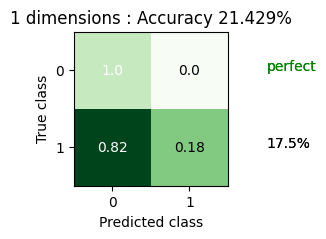

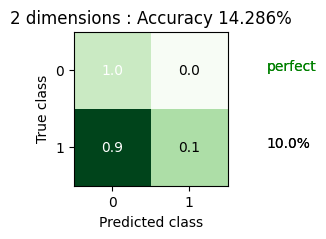

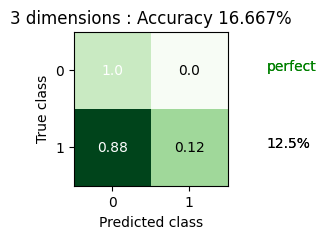

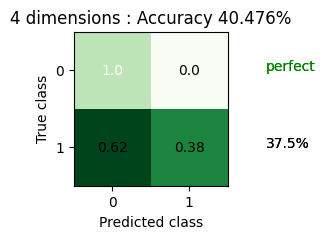

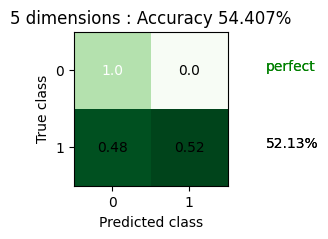

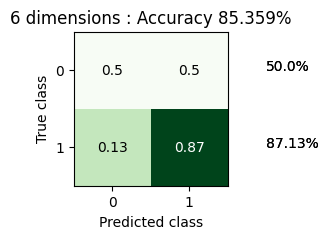

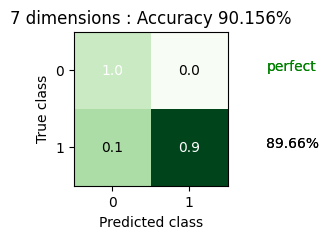

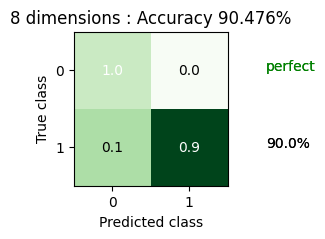

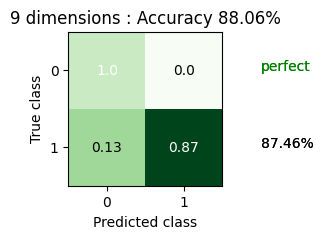

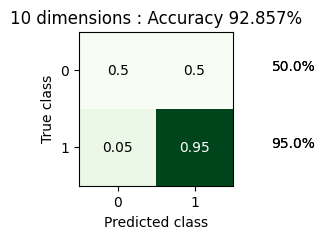

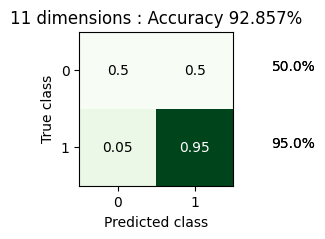

In [43]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

for n in range(1,12):
    pca = PCA(n_components=n)

    X_trn_pca = pca.fit_transform(X_trn)
    X_vld_pca = pca.transform(X_vld)
    X_tst_pca = pca.transform(X_tst)


    clfQDA = QDA()
    clfQDA.fit(X_trn_pca,y_trn)
    y_vld_predict = clfQDA.predict(X_vld_pca)
    y_vld_predict = clfQDA.predict(X_vld_pca)


    confusionMatrix.confusion_matrix(y_vld,y_vld_predict,title= f'{n} dimensions', figsize=(2,2))

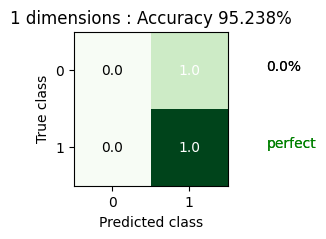

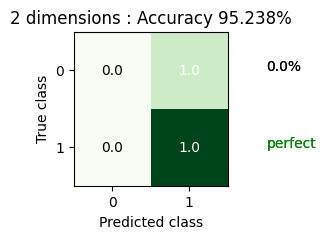

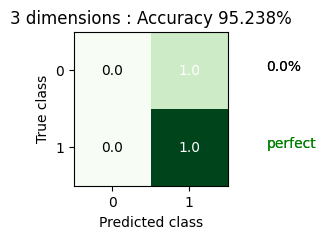

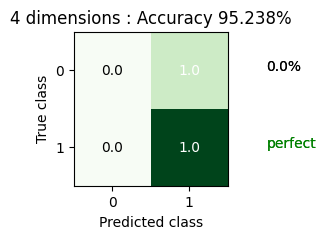

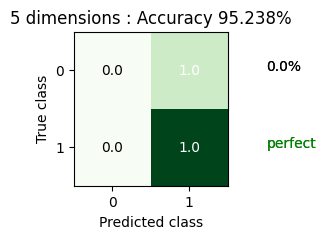

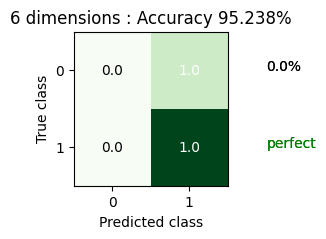

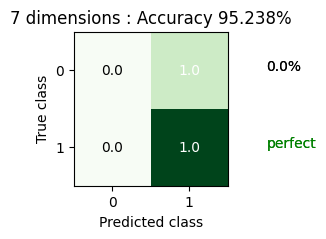

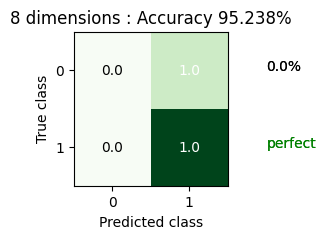

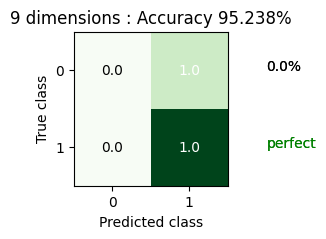

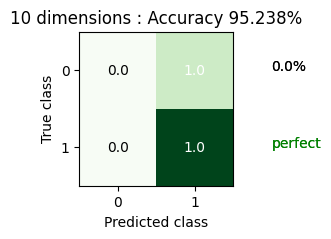

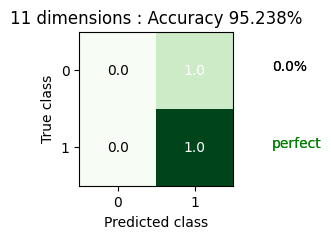

In [46]:
for n in range(1,12):
    y_tst_predict = clfQDA.predict(X_tst_pca)
    confusionMatrix.confusion_matrix(y_tst,y_tst_predict,title= f'{n} dimensions', figsize=(2,2))